In [1]:
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
train_dir = "C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/train"
test_dir = "C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/test"

In [3]:
label = []
count = []
for dir in os.listdir(train_dir):
  label.append(dir)
  count.append(len(os.listdir(f'C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/train/{dir}')))
fig = px.bar(x=label, y=count)
fig.show()

In [4]:
label = []
count = []
for dir in os.listdir(train_dir):
  label.append(dir)
  count.append(len(os.listdir(f'C:/Users/LENOVO/Documents/PKM/Project_PKM/CNN/facial_expression/test/{dir}')))
fig = px.bar(x=label, y=count)
fig.show()

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   validation_split = 0.2)
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(120, 120),
        batch_size=10,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=True)


validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        target_size=(120, 120),
        batch_size=10,
        color_mode = "grayscale",
        class_mode='categorical',
        shuffle=False)

Found 10996 images belonging to 7 classes.
Found 1557 images belonging to 7 classes.


In [7]:
model = Sequential([
    Conv2D(512, (5, 5), activation='relu', input_shape=(120, 120, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.10),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.10),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.10),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Dropout(0.10),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

c:\Users\LENOVO\Documents\PKM\Project_PKM\CNN\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 116, 116, 512)  │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 58, 58, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 58, 58, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 58, 58, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,779,527 (6.79 MB)

 Trainable params: 1,777,607 (6.78 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15


c:\Users\LENOVO\Documents\PKM\Project_PKM\CNN\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1100/1100 ━━━━━━━━━━━━━━━━━━━━ 3500s 3s/step - accuracy: 0.2979 - loss: 1.8909 - val_accuracy: 0.4226 - val_loss: 1.5888
Epoch 2/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2411s 2s/step - accuracy: 0.4677 - loss: 1.4007 - val_accuracy: 0.4849 - val_loss: 1.3609
Epoch 3/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2187s 2s/step - accuracy: 0.5664 - loss: 1.1549 - val_accuracy: 0.5292 - val_loss: 1.2626
Epoch 4/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2193s 2s/step - accuracy: 0.6447 - loss: 0.9432 - val_accuracy: 0.5132 - val_loss: 1.3843
Epoch 5/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2188s 2s/step - accuracy: 0.7012 - loss: 0.7885 - val_accuracy: 0.5523 - val_loss: 1.3416
Epoch 6/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2189s 2s/step - accuracy: 0.7587 - loss: 0.6427 - val_accuracy: 0.5324 - val_loss: 1.5332
Epoch 7/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2176s 2s/step - accuracy: 0.8149 - loss: 0.5249 - val_accuracy: 0.5466 - val_loss: 1.6455
Epoch 8/15
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2190s 2s/step - accuracy: 0.8468 - loss: 0.42

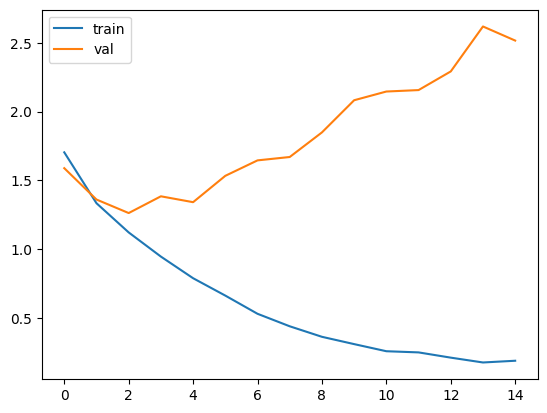

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

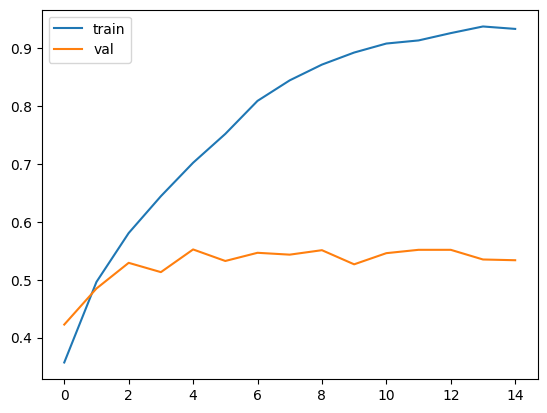

In [12]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [13]:
model.save('model.h5')